# Using SBbadger to create benchmarking models

In [1]:
from SBbadger import generate
import os
import numpy as np
import tellurium as te
import teUtils as tu
import csv
import re
from tqdm import tqdm

In [22]:
NUMBER_OF_SPECIES = 10
NOTE = ''
if NOTE:
    FOLDER_NAME = f'{NUMBER_OF_SPECIES}sp_{NOTE}/'
else: 
    FOLDER_NAME = f'{NUMBER_OF_SPECIES}sp/'
GENERATED_MODEL_PATH = './models/test/'

In [23]:
FOLDER_NAME

'10sp/'

## Generating the networks

In [4]:
generate.models(n_models=500, 
                n_species=NUMBER_OF_SPECIES,
                add_enzyme=True,
                rev_prob=1,
                rxn_prob=[0.5, 0.4, 0.05, 0.05],
                constants=True,
                source=[1, 'loguniform', 0.01, 1],
                sink=[2, 'loguniform', 0.01, 1],
                mass_violating_reactions=False,
                net_plots=True,
                unaffected_nodes = False,
                #mass_balanced=True
               )


## Filtering the synthetic models for "realisticness"

Here, we are making a list of sbml models that pass our checks for "realistic-ness", which are
- the magnitude of all floating species concentrations are under 100
- the magnitude of all reaction rates are under 100
- the magnitude of all flux control coefficients are under 10

Of course, these figures are arbitrary, but a good start for avoiding extremes, considering that there are only 75 species in this model. 

In [5]:
UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 10
LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 1e-3
REACTION_RATE_CUTOFF = 10
FCC_CUTOFF = 10

In [10]:
sbmlPath = GENERATED_MODEL_PATH + 'sbml/'
with open('passlist.txt', 'w') as f:  # Use file to refer to the file object
    for sbml in tqdm(os.listdir(sbmlPath)):
        try: 
            r = te.loads(sbmlPath + sbml)
            r.reset()
            r.conservedMoietyAnalysis = True
            r.simulate(0,1000000)
            ss = r.steadyState()
            
            if len(r.getBoundarySpeciesIds()) != 3:
                pass # print('FAIL:', sbml)
            elif np.all(np.absolute(r.getFloatingSpeciesConcentrations() < UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                if np.all(np.absolute(r.getFloatingSpeciesConcentrations() > LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                    if np.all(np.absolute(r.getReactionRates() < REACTION_RATE_CUTOFF)):
                        if np.all(np.absolute(r.getScaledFluxControlCoefficientMatrix()[0] < FCC_CUTOFF)):
                            #if np.all(np.absolute(r.getReactionRates() != 0)):
                            f.write(re.split(r'[_|.]', sbml)[1]+'\n')
                            #f.write(sbml +'\n')
        except:
            pass# print('FAIL:', sbml)

100%|██████████| 500/500 [01:00<00:00,  8.30it/s]


## Moving the filter-approved files into a saved folder

In [11]:
import shutil
os.getcwd()

'c:\\Users\\user\\Documents\\research\\benchmarking'

In [12]:
folder_types = ['sbml', 'antimony', 'net_figs']

# create a new folder called FOLDER_NAME
os.mkdir('./' + FOLDER_NAME)

# create antimony, netfigs, sbml folders
for type in folder_types: 
    os.mkdir('./' + FOLDER_NAME + f'{type}')


In [17]:
# go into models/test/antimony, netfigs, sbml
# copy all the files listed in passlist to relevent folders in FOLDER_NAME
def copyPassed(passlist, folder_type, ext, file_type=None):
    if file_type: 
        passed = [f'test_{file_type}_'+N+f'.{ext}' for N in passlist]
    else: 
        passed = [f'test_'+N+f'.{ext}' for N in passlist]

    for p in passed: 
        sourcePath = GENERATED_MODEL_PATH + f'{folder_type}/' + p
        destPath = './'+ FOLDER_NAME + f'{folder_type}/'+ p
        shutil.copy(sourcePath, destPath)

with open("passlist.txt") as file:
    passlist = [line.rstrip() for line in file]
 
copyPassed(passlist, 'sbml', 'xml')
copyPassed(passlist, 'antimony', 'ant')
copyPassed(passlist, 'net_figs', 'png', file_type='net_fig')

In [24]:
# move passlist to folder
shutil.move('passlist.txt', FOLDER_NAME + 'passlist.txt')

'10sp/passlist.txt'

## Plotting the passlist

In [14]:
ssPath = './' + FOLDER_NAME + 'ss_figs/'
os.mkdir(ssPath)

saved plot to ./10sp_10n_A/ss_figs/ss_117.png


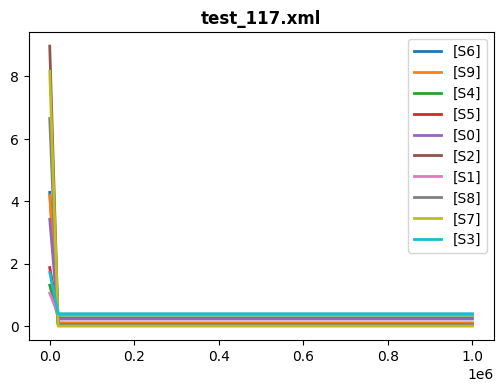

saved plot to ./10sp_10n_A/ss_figs/ss_12.png


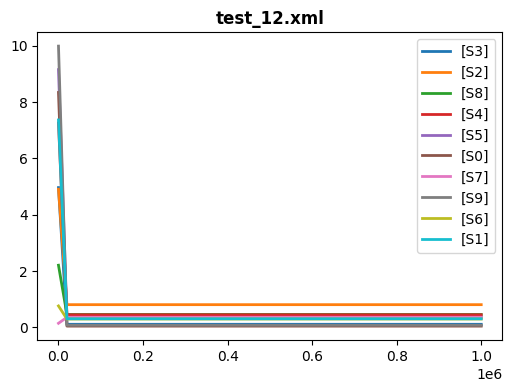

saved plot to ./10sp_10n_A/ss_figs/ss_122.png


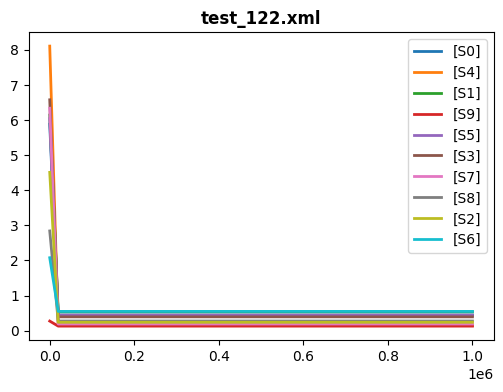

saved plot to ./10sp_10n_A/ss_figs/ss_125.png


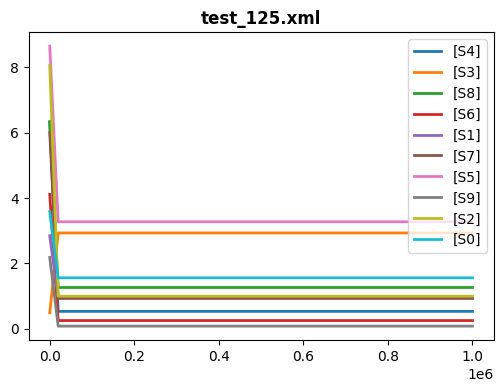

saved plot to ./10sp_10n_A/ss_figs/ss_14.png


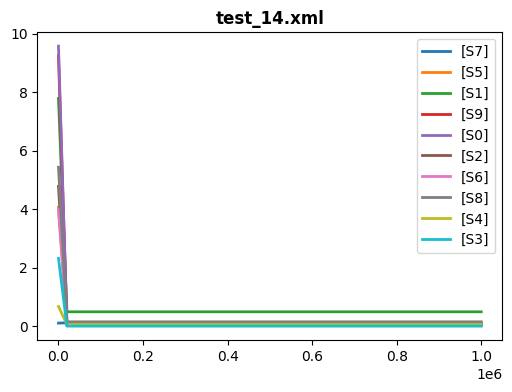

saved plot to ./10sp_10n_A/ss_figs/ss_144.png


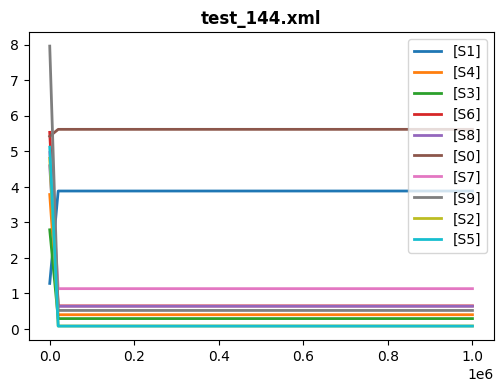

saved plot to ./10sp_10n_A/ss_figs/ss_15.png


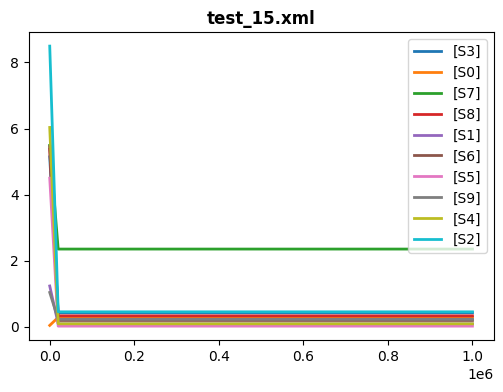

saved plot to ./10sp_10n_A/ss_figs/ss_161.png


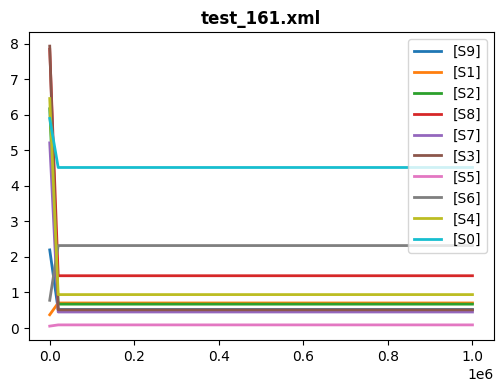

saved plot to ./10sp_10n_A/ss_figs/ss_183.png


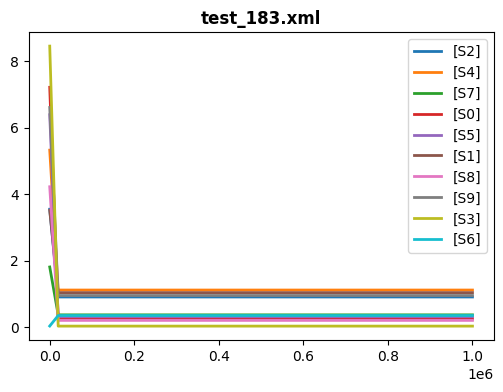

saved plot to ./10sp_10n_A/ss_figs/ss_186.png


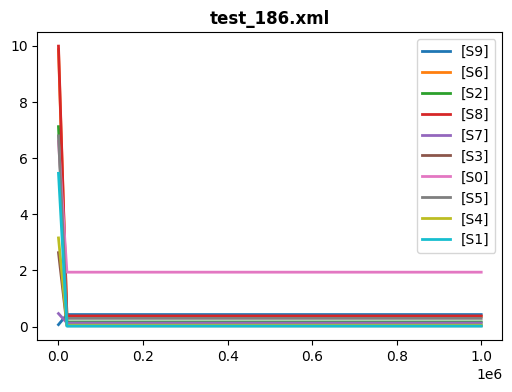

saved plot to ./10sp_10n_A/ss_figs/ss_191.png


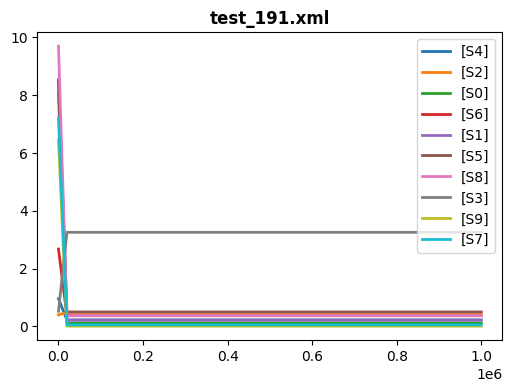

saved plot to ./10sp_10n_A/ss_figs/ss_197.png


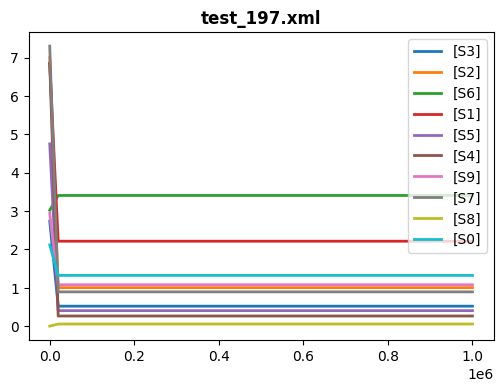

saved plot to ./10sp_10n_A/ss_figs/ss_222.png


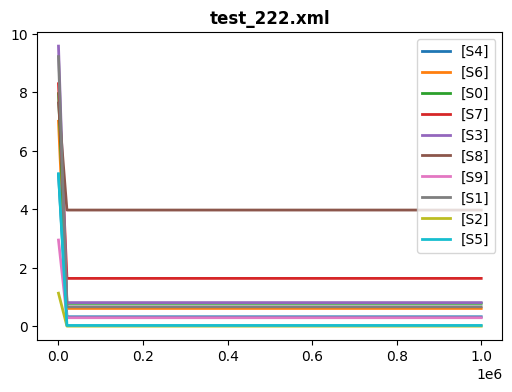

saved plot to ./10sp_10n_A/ss_figs/ss_233.png


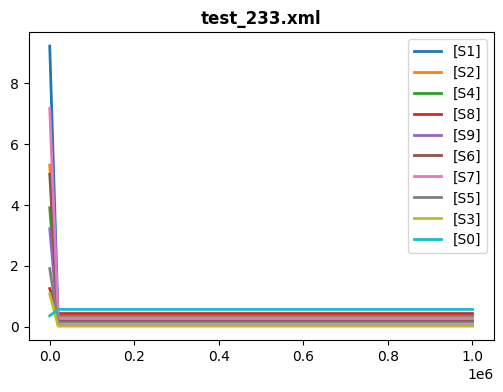

saved plot to ./10sp_10n_A/ss_figs/ss_246.png


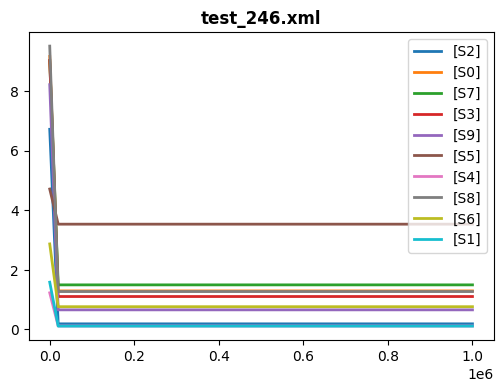

saved plot to ./10sp_10n_A/ss_figs/ss_261.png


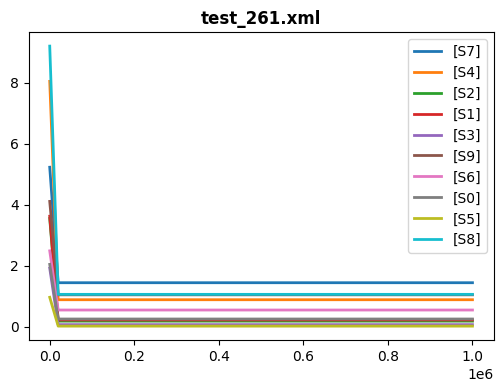

saved plot to ./10sp_10n_A/ss_figs/ss_263.png


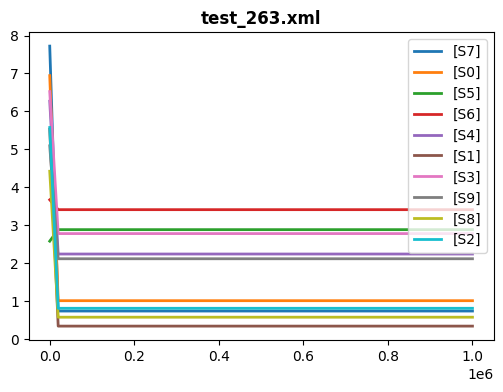

saved plot to ./10sp_10n_A/ss_figs/ss_285.png


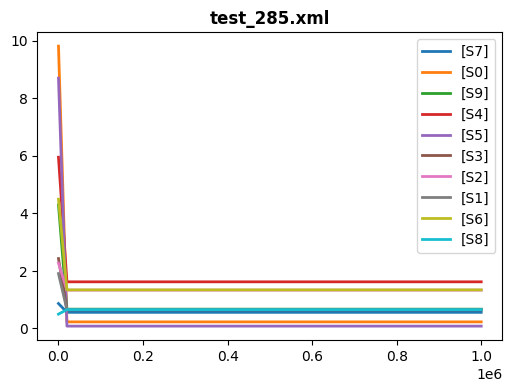

saved plot to ./10sp_10n_A/ss_figs/ss_29.png


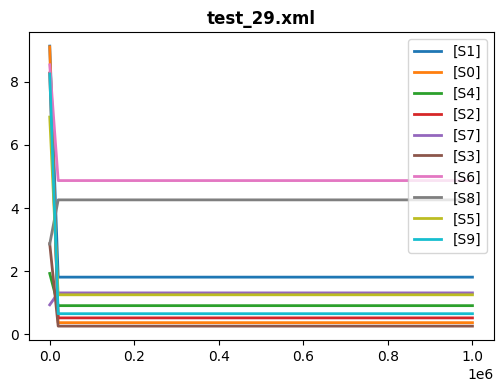

saved plot to ./10sp_10n_A/ss_figs/ss_291.png


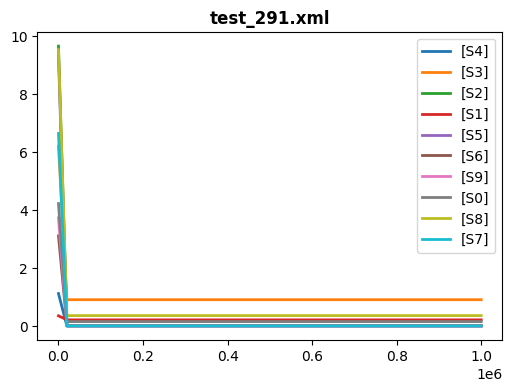

saved plot to ./10sp_10n_A/ss_figs/ss_297.png


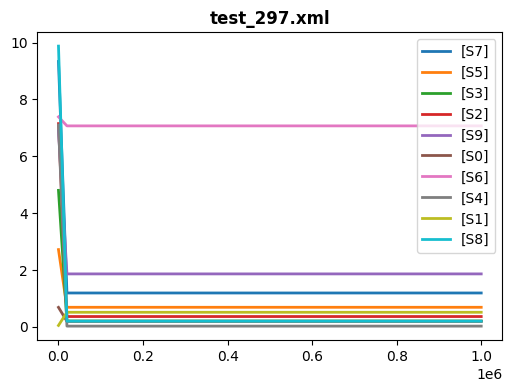

saved plot to ./10sp_10n_A/ss_figs/ss_306.png


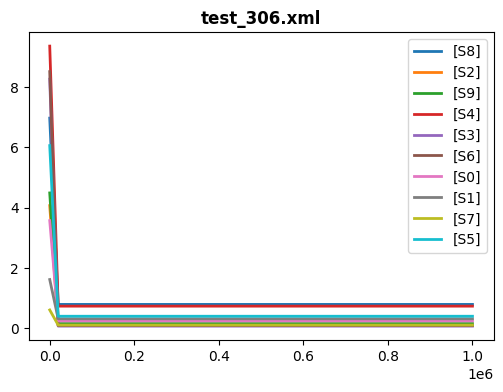

saved plot to ./10sp_10n_A/ss_figs/ss_329.png


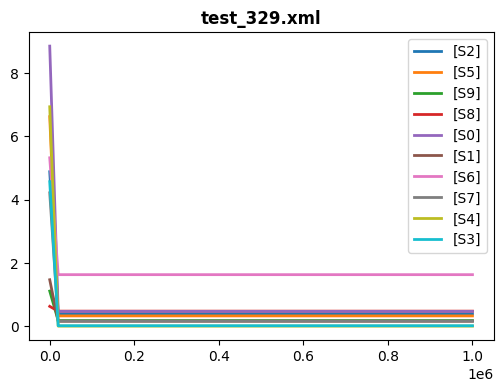

saved plot to ./10sp_10n_A/ss_figs/ss_336.png


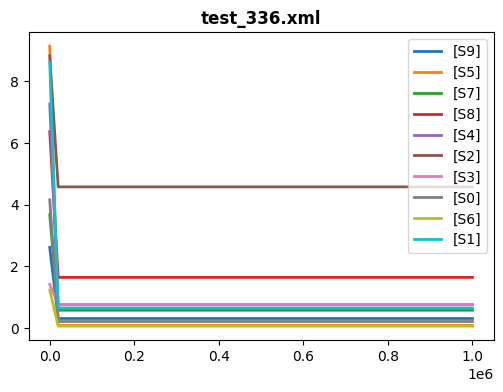

saved plot to ./10sp_10n_A/ss_figs/ss_357.png


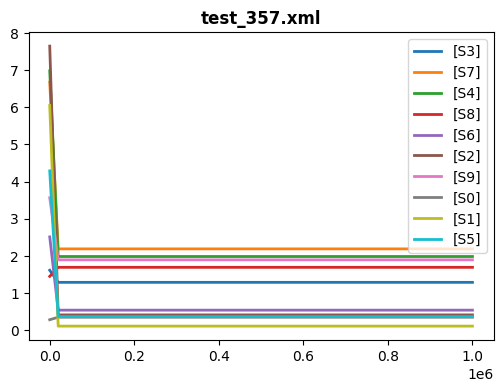

saved plot to ./10sp_10n_A/ss_figs/ss_361.png


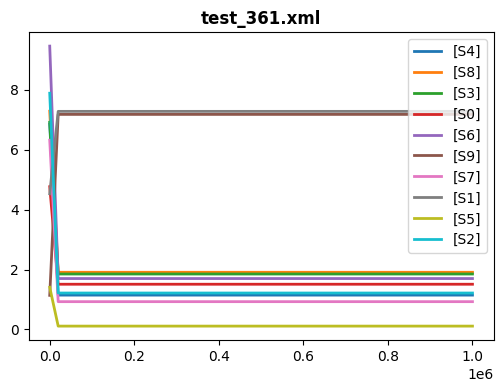

saved plot to ./10sp_10n_A/ss_figs/ss_368.png


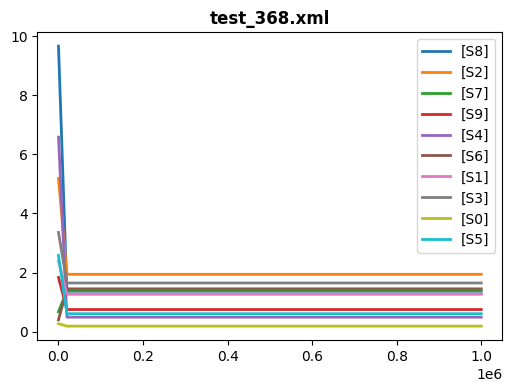

saved plot to ./10sp_10n_A/ss_figs/ss_390.png


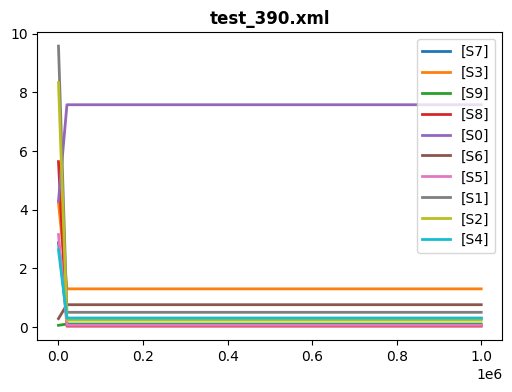

saved plot to ./10sp_10n_A/ss_figs/ss_406.png


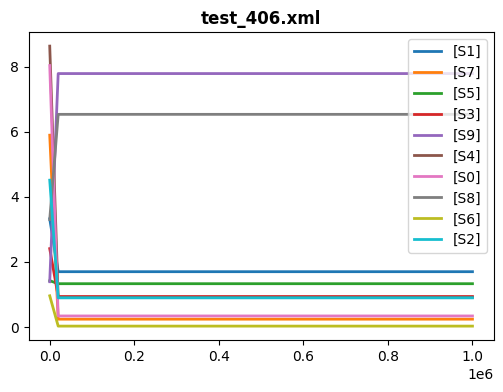

saved plot to ./10sp_10n_A/ss_figs/ss_423.png


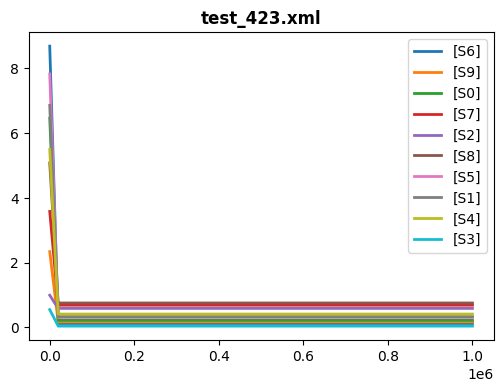

saved plot to ./10sp_10n_A/ss_figs/ss_427.png


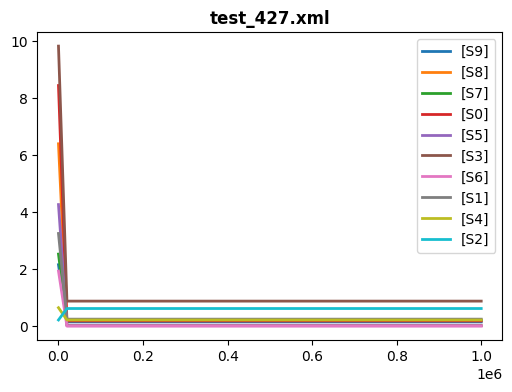

saved plot to ./10sp_10n_A/ss_figs/ss_437.png


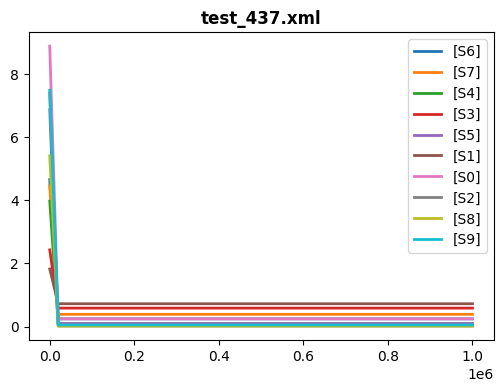

saved plot to ./10sp_10n_A/ss_figs/ss_445.png


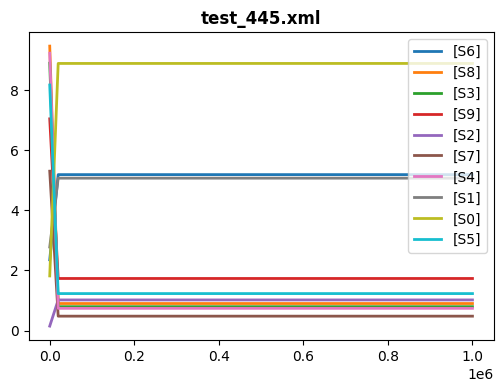

saved plot to ./10sp_10n_A/ss_figs/ss_473.png


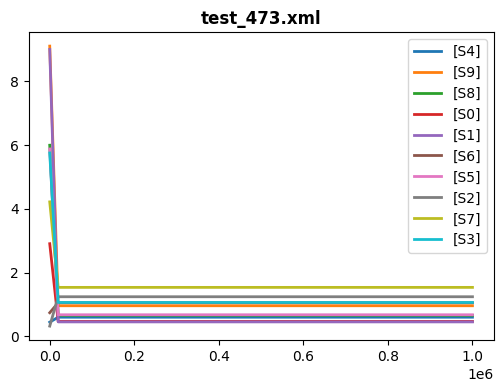

saved plot to ./10sp_10n_A/ss_figs/ss_54.png


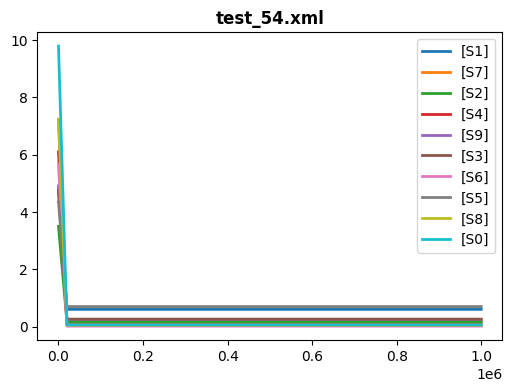

saved plot to ./10sp_10n_A/ss_figs/ss_61.png


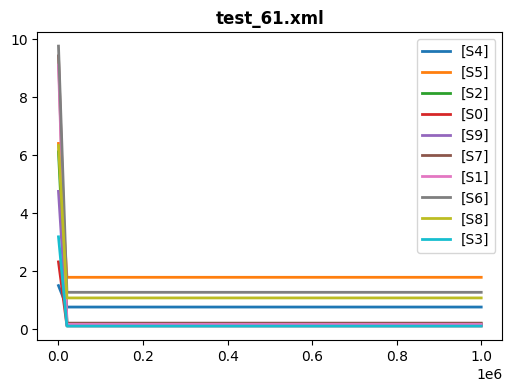

saved plot to ./10sp_10n_A/ss_figs/ss_65.png


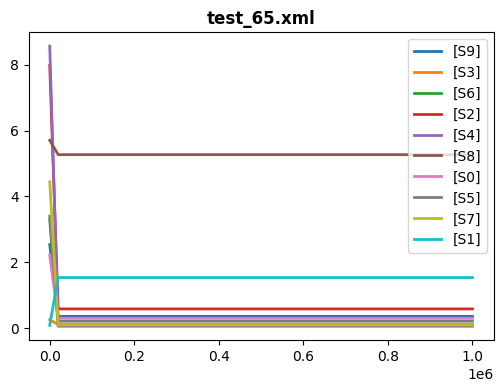

saved plot to ./10sp_10n_A/ss_figs/ss_76.png


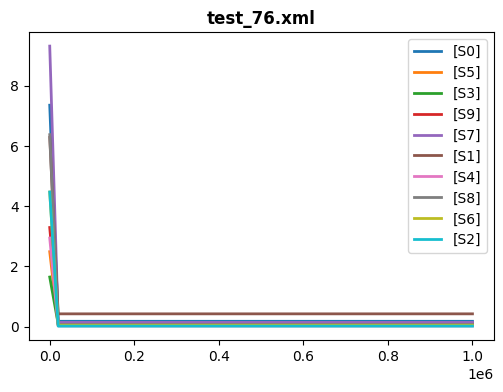

saved plot to ./10sp_10n_A/ss_figs/ss_88.png


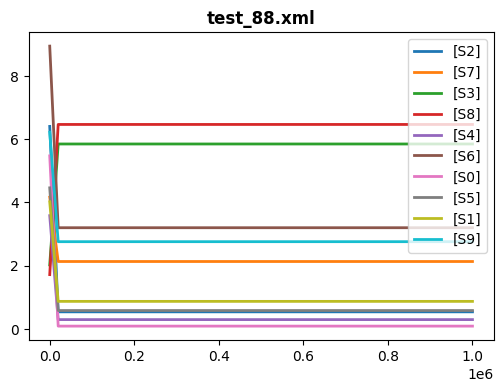

saved plot to ./10sp_10n_A/ss_figs/ss_94.png


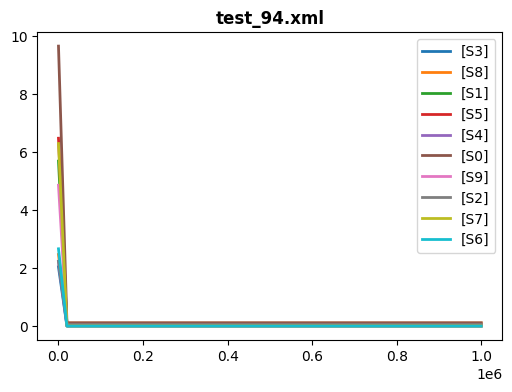

In [18]:
for i,file in enumerate(os.listdir('./'+ FOLDER_NAME + 'sbml/')):   
    r = te.loads(sbmlPath + file)
    r.reset()
    r.conservedMoietyAnalysis = True
    r.simulate(0,1000000)
    r.plot(title=file, savefig=ssPath+f'ss_{passlist[i]}.png')
